# Exercise 3

## Occupancy grid mapping

The aim of this assignment is to implement a 2D occupancy grid mapping algorithm as described in the lecture. We provide data recorded by a robot using a 2D laser scanner in an indoor environment. 

The raw data is arranged in the following manner:

- `poses.data`: contains the **known** robot poses as it moves around the environment. Each line corresponds to the pose of the robot at a time instant

- `ranges.data`: contains 2d laser range measurements recorded by the robot. Each line corresponds to the range measurements taken from the corresponding robot poses.

---

### Log odds to probability

The occupancy calculations are usually performed using the log odds. We will need to convert between log odds and probabilities in this exercise. Implement the `logodds2prob` and `prob2logodds` functions. Verify that the conversion functions are correct for some test input. **[2.0]**

In [1]:
from ex3 import *
prob = 0.75
logodds = prob2logodds(prob)
print(logodds)
prob = logodds2prob(logodds)
print(prob)

1.0986122886681098
0.75


---
### Inverse sensor model

The occupancy grid mapping relies on as inverse sensor model to update the occupancy of a cell in the grid. For this exercise, we consider a simple sensor model, where the occupancy of cell $m_i$ is $P_{occ}$ if the measurement $z_t$ falls in that cell, otherwise the occupancy is $P_{free}$. 

However, if the cell $m_i$ is not in the perception field, the occupancy will be $P_{prior}$.

Use the  following probabilities in the implementation:
$$P_{occ} = 0.9, P_{free} = 0.35, P_{prior} = 0.5 $$

Implement the inverse sensor model function and verify that it is correct for some test input. **[2.0]**

In [2]:
p_occ =0.9
p_free = 0.35
p_prior =0.5

# function takes in starting cell and end cell and returns an array with cells and their probs
cell = [0,0]
endpoint =[10,19]
inverse_sensor_model = inv_sensor_model(cell, endpoint, p_occ, p_free)
print(inverse_sensor_model)

[[ 0.    0.    0.35]
 [ 1.    1.    0.35]
 [ 1.    2.    0.35]
 [ 2.    3.    0.35]
 [ 2.    4.    0.35]
 [ 3.    5.    0.35]
 [ 3.    6.    0.35]
 [ 4.    7.    0.35]
 [ 4.    8.    0.35]
 [ 5.    9.    0.35]
 [ 5.   10.    0.35]
 [ 6.   11.    0.35]
 [ 6.   12.    0.35]
 [ 7.   13.    0.35]
 [ 7.   14.    0.35]
 [ 8.   15.    0.35]
 [ 8.   16.    0.35]
 [ 9.   17.    0.35]
 [ 9.   18.    0.35]
 [10.   19.    0.9 ]]


---
### Occupancy grid mapping algorithm:

Implement the occupancy grid mapping algorithm as described in lecture slides. 

We provide some functions to make the implemntation easier.

- `ranges2cells` converts the raw measurements acquired by the robot (*ranges_raw*) into the correspoding cells of the gridmap.
- `poses2cells` converts the raw poses of the robot (*poses_raw*) into the correspoding cells of the gridmap.
- `bresenham` returns all the cells along a straigh line between two points in the gridmap.

Other parameters you may need in the implemntation are provided below.

Implement the `grid_mapping_with_known_poses` functionn and compute the resulting occupancy grid map using all the measurements provided in the data.

Plot the final occupancy gridmap using the `plot_gridmap` function. **[6.0]**


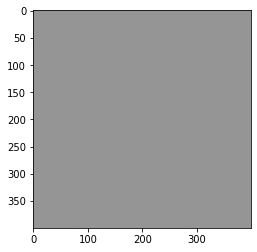

In [3]:
import ex3
import numpy as np
%matplotlib inline

map_size = 100
map_res = 0.25

prior = 0.50
prob_occ = 0.90
prob_free = 0.35

# load data
ranges_raw = np.loadtxt("ranges.data", delimiter=',', dtype='float')
poses_raw = np.loadtxt("poses.data", delimiter=',', dtype='float')

# initialize gridmap
occ_gridmap = ex3.init_gridmap(map_size, map_res)+prior
ex3.plot_gridmap(occ_gridmap)

In [4]:
# Exploring the data
print(type(poses_raw))
print(poses_raw.shape)
for i in range(poses_raw.shape[0]):
    print(poses_raw[i])


<class 'numpy.ndarray'>
(686, 3)
[0. 0. 0.]
[0.319678 0.110037 0.99433 ]
[0.407364 0.462189 1.923808]
[0.133941 0.831492 2.551249]
[-0.436994  1.019508  3.058079]
[-1.095999  1.079299  3.119036]
[-1.738244  1.090434  3.133042]
[-2.324763  1.155695 -3.083435]
[-2.983982  1.048576 -2.937759]
[-3.675353  0.950576  3.087467]
[-4.171551  1.09104   2.623164]
[-4.667641  1.49221   2.324922]
[-5.02195   1.94162   2.237117]
[-5.173494  2.260276  1.667352]
[-5.176948  2.435078  1.005776]
[-5.090663  2.525071  0.256792]
[-5.026007  2.562397 -0.640122]
[-4.968683  2.541938 -1.260774]
[-4.985134  1.970721 -1.553595]
[-4.98837   1.44076  -1.722116]
[-5.116643  1.101831 -2.276301]
[-5.556349  0.827312 -2.887487]
[-6.105078  0.777218  3.132043]
[-6.599541  0.690169 -2.59339 ]
[-6.970919  0.346309 -1.917418]
[-7.10988  -0.167267 -2.065537]
[-7.298898 -0.408535 -2.668075]
[-7.826636 -0.494531 -3.048854]
[-8.111153 -0.588065 -2.274716]
[-8.230219 -0.757825 -1.667226]
[-8.215812 -0.982586 -1.069703]
[-8.0

In [5]:
poses = poses2cells(poses_raw,occ_gridmap,map_res)
print(poses.shape)
print(ranges_raw.shape)
for i in range(1):
    # print(poses[i])
    # print(ranges_raw[i])
    ranges = ranges2cells(ranges_raw[0],poses_raw[0],occ_gridmap,map_res)
    print(ranges.shape)
    print(ranges)


(686, 3)
(686, 361)
(2, 322)
[[202 202 202 202 202 202 203 203 205 205 205 205 206 206 206 206 207 207
  207 207 207 207 207 207 207 207 207 207 208 208 208 208 208 208 207 207
  208 208 215 215 216 216 216 216 217 217 218 219 218 219 217 218 218 218
  218 218 218 218 213 213 213 213 213 213 213 213 213 213 213 214 208 208
  208 208 214 214 214 214 214 215 215 215 215 215 215 215 215 215 215 215
  216 216 216 216 216 216 216 216 216 216 217 217 217 217 212 212 210 210
  210 210 217 211 218 218 218 218 219 219 212 212 219 219 211 220 210 210
  220 220 220 220 221 221 227 228 226 226 225 225 225 225 224 224 223 223
  223 223 223 223 223 223 223 223 222 222 222 222 221 221 221 221 221 221
  218 218 217 217 217 217 217 217 216 216 216 216 216 216 216 216 215 215
  215 215 215 215 215 215 214 214 214 214 214 214 214 214 213 213 213 213
  213 213 213 213 212 212 212 212 212 212 212 212 212 212 211 211 211 211
  211 211 212 212 212 212 212 212 212 212 212 212 213 213 215 215 217 217
  221 221

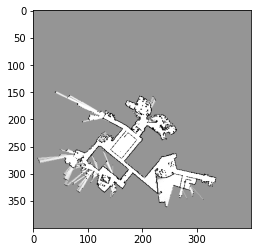

In [10]:
gridmap = grid_mapping_with_known_poses(ranges_raw, poses_raw, occ_gridmap, map_res, prob_occ, prob_free, prior)
%matplotlib inline
ex3.plot_gridmap(gridmap)